# Fiona Nicdao's Assignment 1

In [88]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import  keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

## Processing the MNIST Dataset

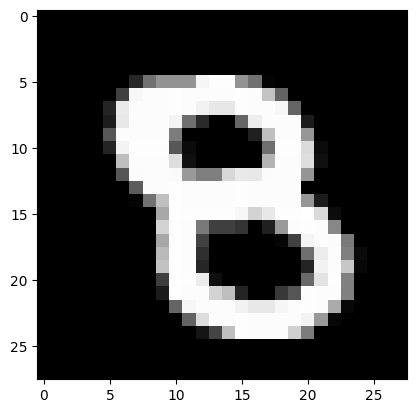

(39200, 784)
(39200, 10)
(21000, 784)
(21000, 10)


In [89]:
#build the model based on the data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Change the data to be split into 70% training set and 30% testing set
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
train_size = 0.7
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size,
                                                    random_state=42)

dev_size = 0.8 * x_train.shape[0]
dev_size = int(dev_size)

#shuffle the x_train (good practice)
#seed for reproducibility
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# plot the image
plt.imshow(x_train[0], cmap='gray')
plt.show()

#dividing the training dataset into 80/20 : training set/ validation set
x_val = x_train[dev_size:] #validation sets
y_val = y_train[dev_size:]

x_train = x_train[:dev_size] #training sets
y_train = y_train[:dev_size]

#preparing training data
#dividing them by max pixel value as a float to get all values btw 0 and 1
x_train = (x_train/255.0).reshape(-1, 28*28)
x_val = (x_val/255.0).reshape(-1, 28*28)
x_test = (x_test/255.0).reshape(-1, 28*28)

#make the classes one-hot encodings
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape) #6000 training samples, image is 28x28 size
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


In [90]:
#check step that the data is normalized between [1.0, 0.0]
x_train[0].max(), x_train[0].min()
# better to have it float values /

(1.0, 0.0)

## Building the Model : MLP

In [91]:
#model
class MLP(tf.keras.Model):
  def __init__(self, num_classes, input_shape, n_layers, n_units, activation,
               optim, loss, initializer,reg):
      super(MLP, self).__init__()
      self.num_classes = num_classes
      self.input_shape = input_shape
      self.n_layers = n_layers
      self.n_units = n_units
      self.activation = activation
      self.optimizer = optim
      self.loss = loss
      self.initializer = initializer
      self.regularizer = reg

      self.model = self.create_model()

  #build the structure of the model
  def create_model(self):
    model = tf.keras.Sequential() # Sequential model is just a placeholder
    model.add(tf.keras.layers.Input(shape=self.input_shape))

    for i in range(self.n_layers):
      model.add(tf.keras.layers.Dense(self.n_units,
                                      input_shape=self.input_shape,
                                      activation=self.activation,
                                      kernel_initializer = self.initializer,
                                      kernel_regularizer= self.regularizer))

    model.add(tf.keras.layers.Dense(self.num_classes, activation='softmax'))

    return model

  def compile_model(self):
    self.model.compile(optimizer=self.optimizer, loss=self.loss,
                       metrics=['accuracy'])

  def train_model(self, x_train, y_train, x_val, y_val, epochs=10,
                  batch_size=32):
    self.model.fit(x_train, y_train, epochs=epochs, batch_size=64,
                   validation_data=(x_val, y_val))

  def evaluate_model(self, x_test, y_test):
    test_loss, test_acc = self.model.evaluate(x_test, y_test)
    return test_loss, test_acc

## TASK 1

In [92]:
mlp_task1 = MLP(num_classes=10,
          input_shape=(28*28,),
          n_layers=2,
          n_units=100,
          activation='relu',
          optim= tf.keras.optimizers.SGD(learning_rate=0.0001),
          loss=tf.keras.losses.CategoricalCrossentropy(),
          initializer=tf.keras.initializers.HeNormal(),
          reg = tf.keras.regularizers.l2(0.001))
mlp_task1.compile_model()
start = time.time()
mlp_task1.train_model(x_train, y_train, x_val, y_val, epochs=50, batch_size=32)
end = time.time()
print(f"Training time for MLP task 1: {end - start} seconds")

Epoch 1/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0977 - loss: 2.8152 - val_accuracy: 0.1051 - val_loss: 2.7562
Epoch 2/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1101 - loss: 2.7328 - val_accuracy: 0.1261 - val_loss: 2.6862
Epoch 3/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1402 - loss: 2.6672 - val_accuracy: 0.1686 - val_loss: 2.6277
Epoch 4/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1874 - loss: 2.6093 - val_accuracy: 0.2189 - val_loss: 2.5756
Epoch 5/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2368 - loss: 2.5580 - val_accuracy: 0.2684 - val_loss: 2.5273
Epoch 6/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2857 - loss: 2.5117 - val_accuracy: 0.3170 - val_loss: 2.4812
Epoch 7/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3327 - loss: 2.4661 - val_accuracy: 0.3630 - val_loss: 2.4362
Epoch 8/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3827 - loss: 2.4208 - val_accuracy: 0.

In [93]:
mlp_task1.evaluate_model(x_test, y_test)

mlp_task1.summary()

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8165 - loss: 1.1651


Model: "mlp_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_15 (Sequential)           │ (None, 10)                  │          89,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

## TASK 2

In [94]:
# make a dataframe to compare the accuracy and loss for all the different activation
df = pd.DataFrame(columns=['Activation', 'Loss', 'Accuracy','Time'])

### Sigmoid activation

In [95]:
mlp_sigmoid = MLP(num_classes=10,
          input_shape=(28*28,),
          n_layers=2,
          n_units=100,
          activation='sigmoid',
          optim= tf.keras.optimizers.SGD(learning_rate=0.0001),
          loss=tf.keras.losses.CategoricalCrossentropy(),
          initializer=tf.keras.initializers.RandomNormal(),
          reg = tf.keras.regularizers.l2(0.001))
mlp_sigmoid.compile_model()
start = time.time()
mlp_sigmoid.train_model(x_train, y_train, x_val, y_val, epochs=50, batch_size=32)
end = time.time()
print(f"Training time for MLP task 2 sigmoid activation: {end - start} seconds")
print("\n")
test_loss, test_acc = mlp_sigmoid.evaluate_model(x_test, y_test)
df.loc[len(df)] =['sigmoid',test_loss, test_acc, end - start]
mlp_sigmoid.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0951 - loss: 2.7572 - val_accuracy: 0.0992 - val_loss: 2.7031
Epoch 2/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0992 - loss: 2.6966 - val_accuracy: 0.0992 - val_loss: 2.6580
Epoch 3/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1002 - loss: 2.6495 - val_accuracy: 0.0992 - val_loss: 2.6244
Epoch 4/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1000 - loss: 2.6226 - val_accuracy: 0.0992 - val_loss: 2.5989
Epoch 5/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1009 - loss: 2.5982 - val_accuracy: 0.0992 - val_loss: 2.5793
Epoch 6/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0985 - loss: 2.5803 - val_accuracy: 0.0992 - val_loss: 2.5642
Epoch 7/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0999 - loss: 2.5658 - val_accuracy: 0.0992 - val_loss: 2.5526
Epoch 8/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0964 - loss: 2.5525 - val_accuracy: 0.

Model: "mlp_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)           │ (None, 10)                  │          89,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

### Tanh activation

In [96]:
mlp_tanh = MLP(num_classes=10,
          input_shape=(28*28,),
          n_layers=2,
          n_units=100,
          activation='tanh',
          optim= tf.keras.optimizers.SGD(learning_rate=0.0001),
          loss=tf.keras.losses.CategoricalCrossentropy(),
          initializer=tf.keras.initializers.RandomNormal(),
          reg = tf.keras.regularizers.l2(0.001))
mlp_tanh.compile_model()
start = time.time()
mlp_tanh.train_model(x_train, y_train, x_val, y_val, epochs=50, batch_size=32)
end = time.time()
print(f"Training time for MLP task 2 tanh activation: {end - start} seconds")
print("\n")
test_loss, test_acc = mlp_tanh.evaluate_model(x_test, y_test)
df.loc[len(df)] =['tanh',test_loss, test_acc, end - start]
mlp_tanh.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1057 - loss: 2.5444 - val_accuracy: 0.1479 - val_loss: 2.5128
Epoch 2/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1636 - loss: 2.5003 - val_accuracy: 0.2092 - val_loss: 2.4695
Epoch 3/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2296 - loss: 2.4568 - val_accuracy: 0.2680 - val_loss: 2.4279
Epoch 4/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2797 - loss: 2.4155 - val_accuracy: 0.3184 - val_loss: 2.3875
Epoch 5/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3277 - loss: 2.3753 - val_accuracy: 0.3596 - val_loss: 2.3482
Epoch 6/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3692 - loss: 2.3381 - val_accuracy: 0.4065 - val_loss: 2.3097
Epoch 7/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4127 - loss: 2.2978 - val_accuracy: 0.4517 - val_loss: 2.2718
Epoch 8/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4554 - loss: 2.2636 - val_accuracy: 0.

Model: "mlp_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_17 (Sequential)           │ (None, 10)                  │          89,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

### Relu activation

In [97]:
mlp_relu = MLP(num_classes=10,
          input_shape=(28*28,),
          n_layers=2,
          n_units=100,
          activation='relu',
          optim= tf.keras.optimizers.SGD(learning_rate=0.0001),
          loss=tf.keras.losses.CategoricalCrossentropy(),
          initializer=tf.keras.initializers.RandomNormal(),
          reg = tf.keras.regularizers.l2(0.001))
mlp_relu.compile_model()
start = time.time()
mlp_relu.train_model(x_train, y_train, x_val, y_val, epochs=50, batch_size=32)
end = time.time()
print(f"Training time for MLP task 2 relu activation: {end - start} seconds")
print("\n")
test_loss, test_acc = mlp_relu.evaluate_model(x_test, y_test)
df.loc[len(df)] =['relu',test_loss, test_acc,end - start]
mlp_relu.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1249 - loss: 2.5237 - val_accuracy: 0.1382 - val_loss: 2.5134
Epoch 2/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1426 - loss: 2.5091 - val_accuracy: 0.1565 - val_loss: 2.4986
Epoch 3/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1632 - loss: 2.4949 - val_accuracy: 0.1777 - val_loss: 2.4842
Epoch 4/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1803 - loss: 2.4811 - val_accuracy: 0.2016 - val_loss: 2.4701
Epoch 5/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2054 - loss: 2.4655 - val_accuracy: 0.2276 - val_loss: 2.4561
Epoch 6/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2295 - loss: 2.4525 - val_accuracy: 0.2520 - val_loss: 2.4423
Epoch 7/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2523 - loss: 2.4392 - val_accuracy: 0.2756 - val_loss: 2.4286
Epoch 8/50
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2726 - loss: 2.4258 - val_accuracy: 0.

Model: "mlp_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)           │ (None, 10)                  │          89,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compare the accuracy, loss, time for all the different activation

In [98]:
print(df)

  Activation      Loss  Accuracy        Time
0    sigmoid  2.509926  0.112571  231.947381
1       tanh  1.179146  0.798476  200.745211
2       relu  1.511621  0.753190  213.753731


# Results: Activation = tanh, has the least amount of loss and highest accuracy. But the fastest time varies, sometimes its tanh and other times it is relu. My last fastest time is relu.